In [1]:
#importing the required libraries for data preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The dataset provided is in the txt format so we need to read the dataset using "read_table" function instead of regular "read_csv".

In [2]:
df = pd.read_table('IndianLiverPatientData.txt', header=None)

Visualize the 1st 10 values 

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
1,2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
2,3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
3,4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
4,5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


A we can see that our dataset does not have column names it is just named as 1,2,3,... so we need to provide the columns with their respective names. The information of column names can be taken from our data metadata.

### Giving Column Names

In [4]:
df.columns =['ID', 'Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Class']

In [5]:
df.head()

,ID,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
1,2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
2,3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
3,4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
4,5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


Total datapoint count

In [6]:
df.count().sum()

6957

We got 6957 total data points

In [7]:
#print the information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          583 non-null    int64  
 1   Age                         583 non-null    int64  
 2   Gender                      563 non-null    object 
 3   Total_Bilirubin             583 non-null    float64
 4   Direct_Bilirubin            583 non-null    float64
 5   Alkaline_Phosphotase        583 non-null    int64  
 6   Alamine_Aminotransferase    583 non-null    int64  
 7   Aspartate_Aminotransferase  583 non-null    int64  
 8   Total_Protiens              568 non-null    float64
 9   Albumin                     583 non-null    float64
 10  Albumin_and_Globulin_Ratio  579 non-null    float64
 11  Class                       583 non-null    object 
dtypes: float64(5), int64(5), object(2)
memory usage: 54.8+ KB


In [8]:
#Lets check for unique values and their count for Class(dependent) variable
df['Class'].value_counts()

No     416
Yes    167
Name: Class, dtype: int64

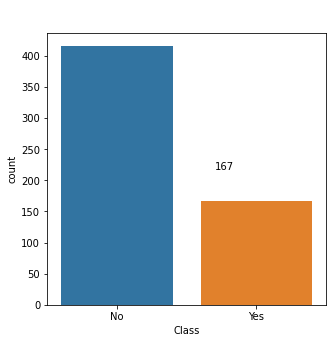

In [9]:
# Plotting for the output variable
import seaborn as sns
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Class', data=df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Here this bar graph easily shows how data is imbalanced. Less than 30% data is in class 1. So, first, we have to balance the data in to get more precise predictions.

For that we are using Over sampling

But before that we need to do the important NA imputations and Encoding

##### It can be seen that the dataset has 2 object(Categorical) type and rest integer type variables. 

### Check for the missing values in the data

In [10]:
df.isna().sum()

ID                             0
Age                            0
Gender                        20
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                15
Albumin                        0
Albumin_and_Globulin_Ratio     4
Class                          0
dtype: int64

We got 20 missing values in Gender, 15 in Total_Protiens and 4 in Albumin_and_Globulin_Ratio 

In [11]:
print("Gender:", df['Gender'].isna().sum() / df['Gender'].count() * 100,"% of missing values")
print('-----------------------------------------------------')
print("Total_Protiens:", df['Total_Protiens'].isna().sum() / df['Total_Protiens'].count() * 100,"% of missing values")
print('-----------------------------------------------------')
print("Albumin_and_Globulin_Ratio:", df['Albumin_and_Globulin_Ratio'].isna().sum() / df['Albumin_and_Globulin_Ratio'].count() * 100,"% of missing values")

Gender: 3.5523978685612785 % of missing values
-----------------------------------------------------
Total_Protiens: 2.640845070422535 % of missing values
-----------------------------------------------------
Albumin_and_Globulin_Ratio: 0.690846286701209 % of missing values


### Note:
In the above missing value data we got 1 object type variable and rest int type so to do the imputations we need to seperate object type from integer type

## First we will do the Encoding for Gender and Class variable

In [12]:
df1 = df

In [13]:
#replacing NA values with astring missing because encoding does not take place on a data having missng values
df1['Gender']=df1['Gender'].fillna('Missing')

In [14]:
df1['Gender'].unique()

array(['Female', 'Male', 'Missing'], dtype=object)

In [15]:
#Importing the required libraries for performing the encoding
from sklearn.preprocessing import OrdinalEncoder

In [16]:
#initialize Ordinal Encoder as "oe" and give the categories to be encoded and encoding will take place in indexing manner
oe = OrdinalEncoder(categories=[['Female', 'Male', 'Missing']])

oe1 = OrdinalEncoder(categories=[['No', 'Yes']])

In [17]:
df1['Gender'] = oe.fit_transform(df1[['Gender']])

df1['Class'] = oe1.fit_transform(df1[['Class']])

In [18]:
print(df1['Gender'].unique())
print("---------------------------------")
print(df1['Class'].unique())

[0. 1. 2.]
---------------------------------
[0. 1.]


Here 0: Female, 1: Male and 2: Missing <-- for Gender

and 0: No and 1: Yes <-- for Class

#### Now we will perform Imputation in the missing values of categorical variable ie. Gender

In [19]:
#Import the library for imputing the NA values
from sklearn.impute import KNNImputer

In [20]:
#missin_values will help by converting the NA values that we have encoded as 2 or else with out missing_values parameter the imputer will find for "NA"
impute = KNNImputer(n_neighbors=10, missing_values=2)
# fitting the imputer to our dataset
impute.fit(df1[['Gender']])

KNNImputer(missing_values=2, n_neighbors=10)

In [21]:
df1['Gender'] = pd.DataFrame(impute.transform(df1[['Gender']]))

In [22]:
df1['Gender'] = df1['Gender'].round().astype(int)

df1['Class'] = df1['Class'].round().astype(int)

In [23]:
print(df1['Gender'].unique())
df1.head(20)

[0 1]


,ID,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,1,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,2,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,3,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,4,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,5,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
5,6,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,0
6,7,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,0
7,8,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,0
8,9,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,1
9,10,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,0


## Impuations in continous variable 1.Total_Protiens and 2.Albumin_and_Globulin_Ratio

Now we will use Iterative Imputer for the imputations

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [25]:
impute_it = IterativeImputer()
impute_it.fit_transform(df1)

array([[  1.  ,  65.  ,   0.  , ...,   3.3 ,   0.9 ,   0.  ],
       [  2.  ,  62.  ,   1.  , ...,   3.2 ,   0.74,   0.  ],
       [  3.  ,  62.  ,   1.  , ...,   3.3 ,   0.89,   0.  ],
       ...,
       [581.  ,  52.  ,   1.  , ...,   3.2 ,   1.  ,   0.  ],
       [582.  ,  31.  ,   1.  , ...,   3.4 ,   1.  ,   0.  ],
       [583.  ,  38.  ,   1.  , ...,   4.4 ,   1.5 ,   1.  ]])

In [26]:
#Thw output we get is in the form of an Array so we need to convert it into a dataframe and give a new name 
df2 = pd.DataFrame(impute_it.fit_transform(df1), columns=df1.columns)

In [27]:
#Removing Decimals from Categorical Variables
df2['Gender'] = df2['Gender'].astype(int)
df2['Class'] = df2['Class'].astype(int)

In [28]:
df2.head()

,ID,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,1.0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0
1,2.0,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0
2,3.0,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0
3,4.0,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0
4,5.0,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0


In [29]:
df2.isna().sum()

ID                            0
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Class                         0
dtype: int64

#### Hence we got rid of all the missing values

## Now lets perform Over Sampeling

In [30]:
X = df2.drop(labels=['Class'], axis=1)
                       
y = df2['Class']

The method we will be using for oversampeling is SMOTE

In [31]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
#SAVE OUR NEW OVERSAMPLED DATA IN X_over and y_over
X_over, y_over = oversample.fit_sample(X, y)

In [32]:
X_over.columns

Index(['ID', 'Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [33]:
y_over_df = pd.DataFrame(y_over, columns=["Class"])

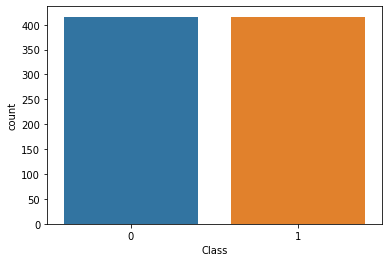

In [34]:
# count plot on single categorical variable
sns.countplot(x ='Class', data = y_over_df)
 
# Show the plot
plt.show()

#### Checking for low variance features

Feature selector that removes all low-variance features.
This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [35]:
##import VarianceThreshold Class
from sklearn.feature_selection import VarianceThreshold

In [36]:
#initialize the class
#give a particular threshold value
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_over)

VarianceThreshold(threshold=0)

In [37]:
#Finding Constant Columns

constant_columns = [column for column in X_over.columns if column not in X_over.columns[var_thres.get_support()]]

print(len(constant_columns))

print("As we can see that we dont have any low variance feature present in our dataset")

0
As we can see that we dont have any low variance feature present in our dataset


### Lets check for type of Distribution of our continous variables

## Q-Q Plot 

In [38]:
import scipy.stats as stats

In [39]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [40]:
X_over.columns

Index(['ID', 'Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

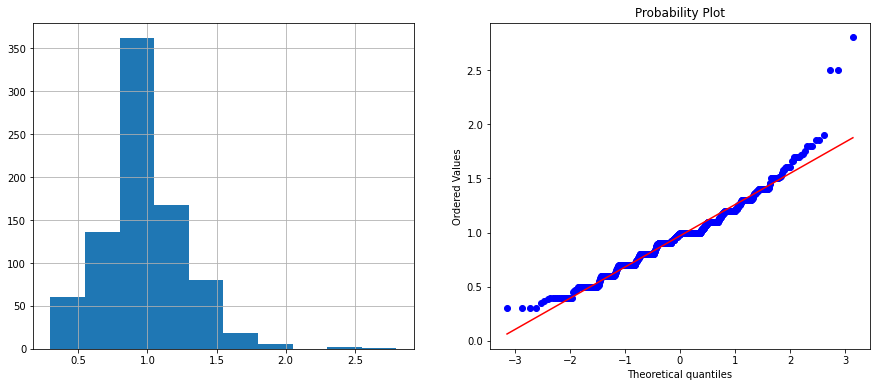

Albumin_and_Globulin_Ratio None


In [41]:
print('Albumin_and_Globulin_Ratio', diagnostic_plots(X_over, 'Albumin_and_Globulin_Ratio'))

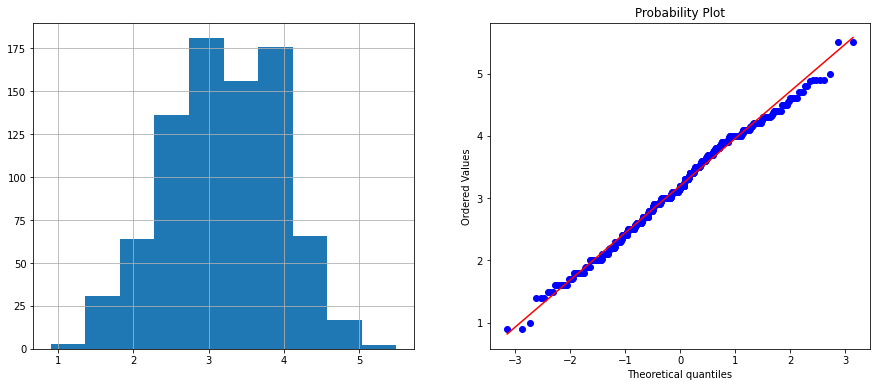

Albumin None


In [42]:
print('Albumin', diagnostic_plots(X_over, 'Albumin'))

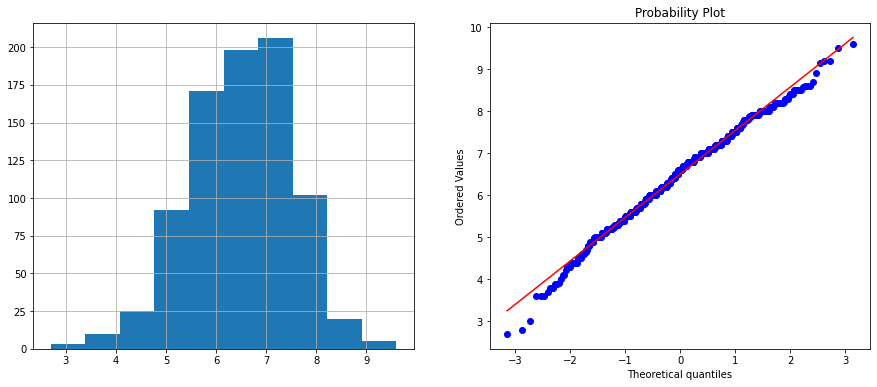

Total_Protiens None


In [43]:
print('Total_Protiens', diagnostic_plots(X_over, 'Total_Protiens'))

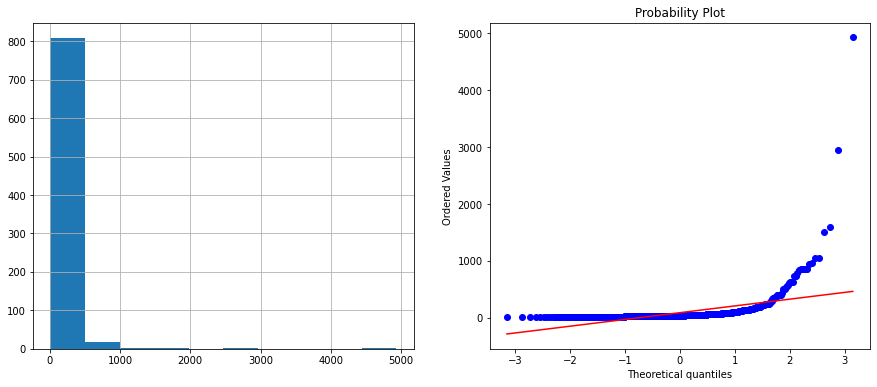

Aspartate_Aminotransferase None


In [44]:
print('Aspartate_Aminotransferase', diagnostic_plots(X_over, 'Aspartate_Aminotransferase'))

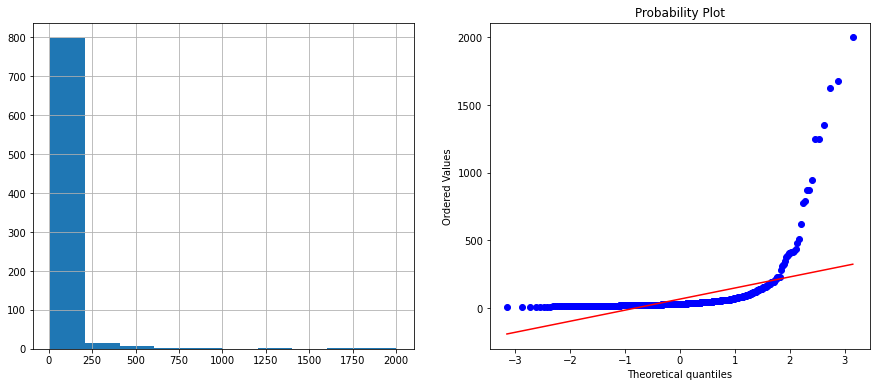

Alamine_Aminotransferase None


In [45]:
print('Alamine_Aminotransferase', diagnostic_plots(X_over, 'Alamine_Aminotransferase'))

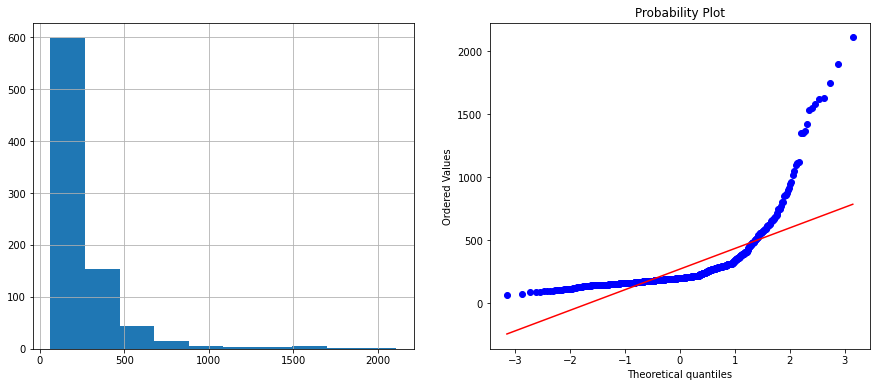

Alkaline_Phosphotase None


In [46]:
print('Alkaline_Phosphotase', diagnostic_plots(X_over, 'Alkaline_Phosphotase'))

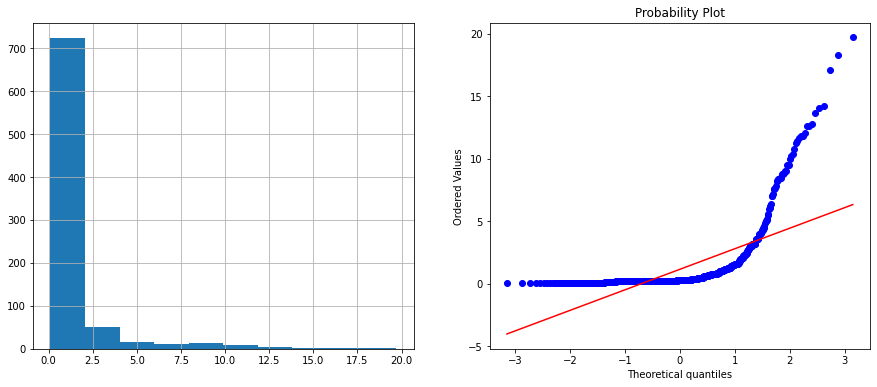

Direct_Bilirubin None


In [47]:
print('Direct_Bilirubin', diagnostic_plots(X_over, 'Direct_Bilirubin'))

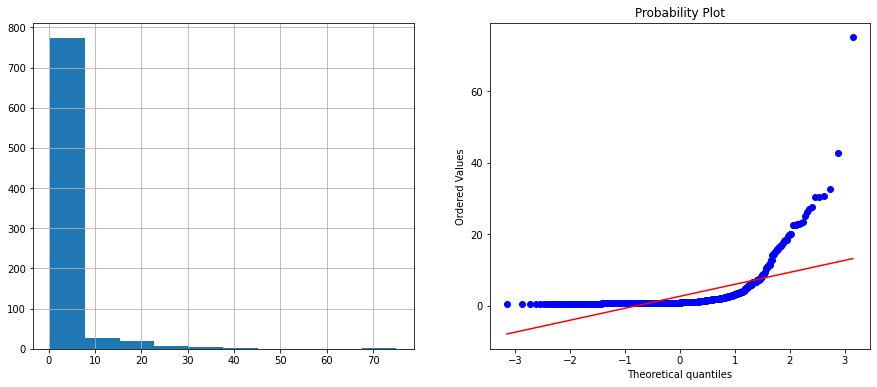

Total_Bilirubin None


In [48]:
print('Total_Bilirubin', diagnostic_plots(X_over, 'Total_Bilirubin'))

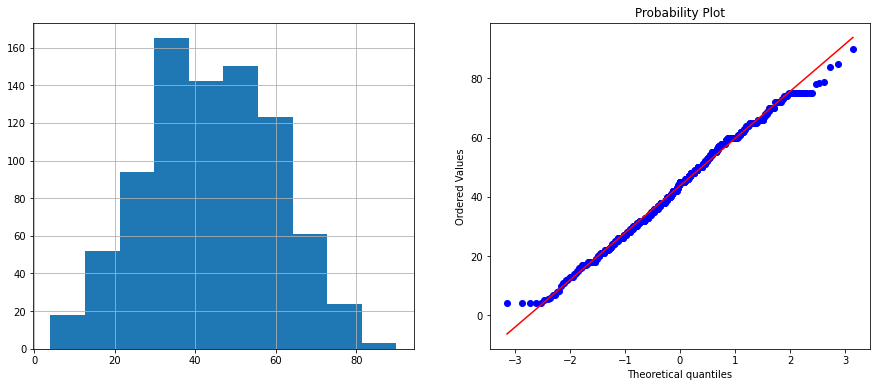

Age None


In [49]:
print('Age', diagnostic_plots(X_over, 'Age'))

From the above graphs we can see that some of our variables are right skewed and need to be treated inorder to get better predictions. So we will perform Log Transformations which will convert our skewed data similiar to Gaussian Distribution

### Log Transformations

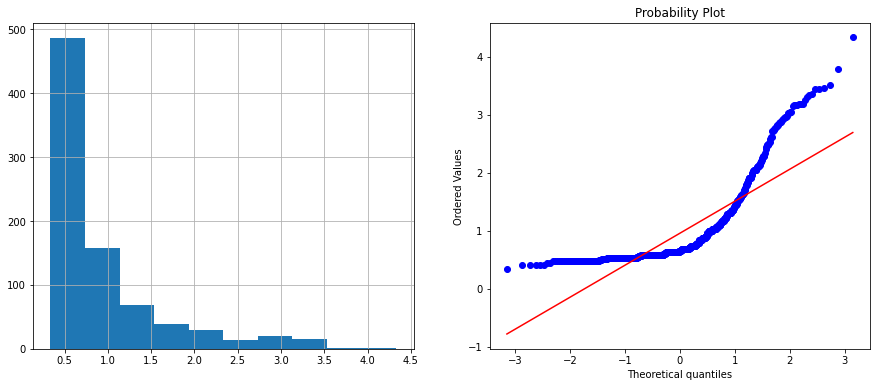

Total_Bilirubin None


In [50]:
X_over['Total_Bilirubin'] = np.log(X_over['Total_Bilirubin']+1)
print('Total_Bilirubin', diagnostic_plots(X_over, 'Total_Bilirubin'))

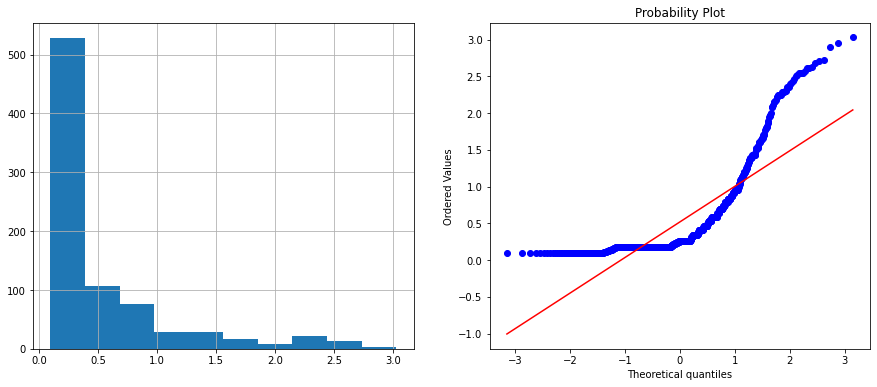

Direct_Bilirubin None


In [51]:
X_over['Direct_Bilirubin'] = np.log(X_over['Direct_Bilirubin']+1)
print('Direct_Bilirubin', diagnostic_plots(X_over, 'Direct_Bilirubin'))

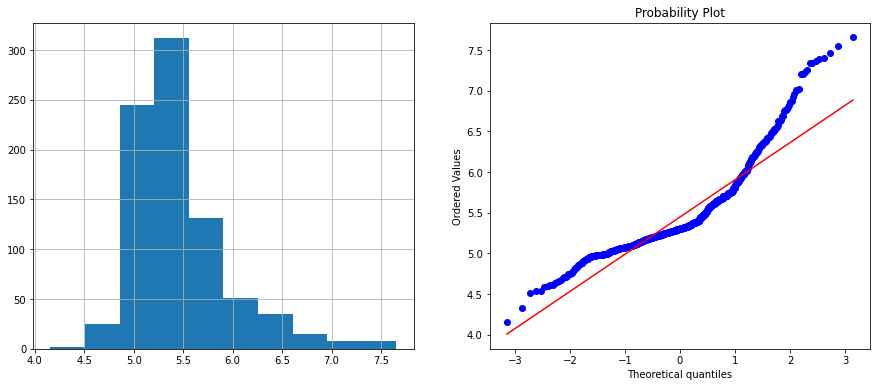

Alkaline_Phosphotase None


In [52]:
X_over['Alkaline_Phosphotase'] = np.log(X_over['Alkaline_Phosphotase']+1)
print('Alkaline_Phosphotase', diagnostic_plots(X_over, 'Alkaline_Phosphotase'))

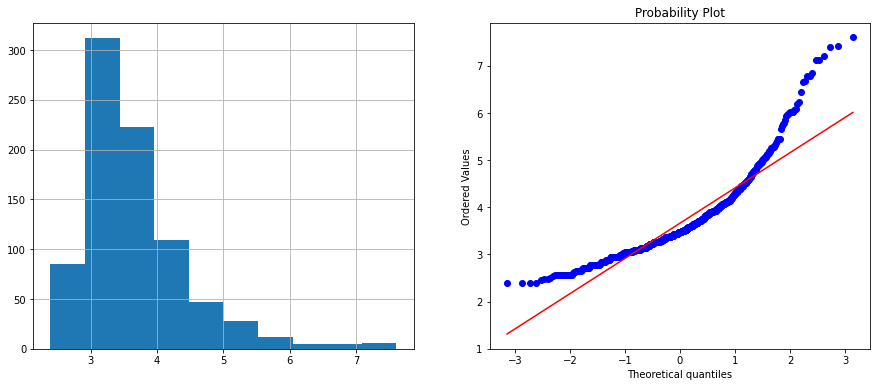

Alamine_Aminotransferase None


In [53]:
X_over['Alamine_Aminotransferase'] = np.log(X_over['Alamine_Aminotransferase']+1)
print('Alamine_Aminotransferase', diagnostic_plots(X_over, 'Alamine_Aminotransferase'))

In the log transformations we are able to transform 2 variables(Alamine_Aminotransferase and Alkaline_Phosphotase) to some what Gaussian Distribution.

In [54]:
X_over.head()

,ID,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.0,65.0,0,0.530628,0.095310,5.236442,2.833213,18.0,6.8,3.3,0.90
1,2.0,62.0,1,2.476538,1.871802,6.551080,4.174387,100.0,7.5,3.2,0.74
2,3.0,62.0,1,2.116256,1.629241,6.196444,4.110874,68.0,7.0,3.3,0.89
3,4.0,58.0,1,0.693147,0.336472,5.209486,2.708050,20.0,6.8,3.4,1.00
4,5.0,72.0,1,1.589235,1.098612,5.278115,3.332205,59.0,7.3,2.4,0.40


## VISUALIZATIONS

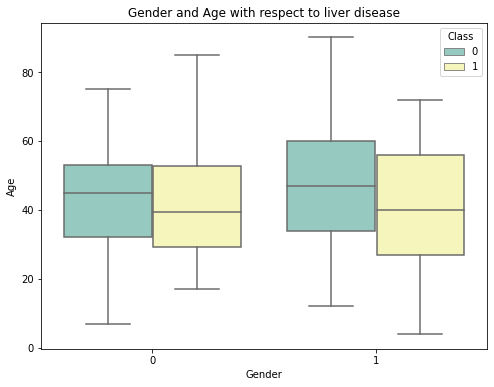

In [55]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Gender', y = 'Age', hue = 'Class', data = df2, palette='Set3')
plt.title('Gender and Age with respect to liver disease')
plt.show()

The inferences that can be drawn from the above plot is that...In female the age range from 25 to 50 are more prone to be a liver patient whereas in Male the range is quite more that the female which is between 22 to 55 approx.

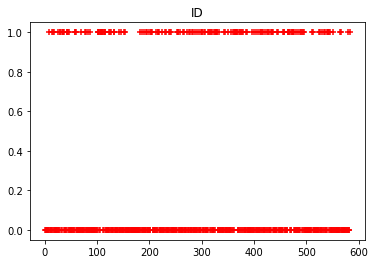

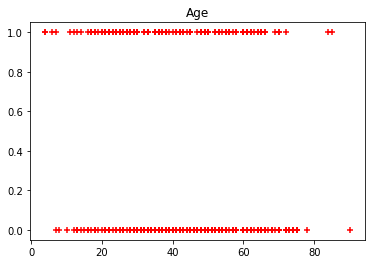

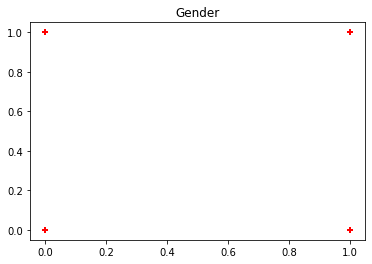

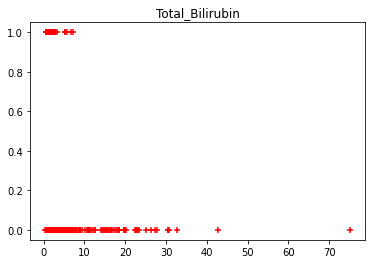

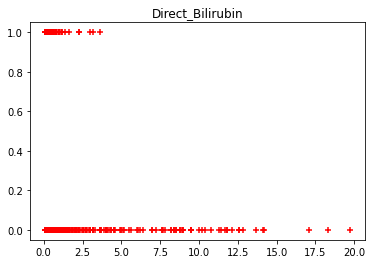

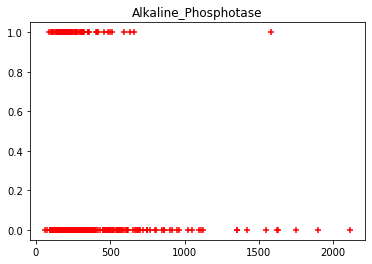

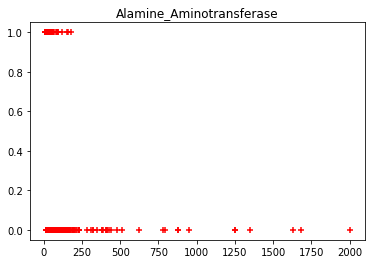

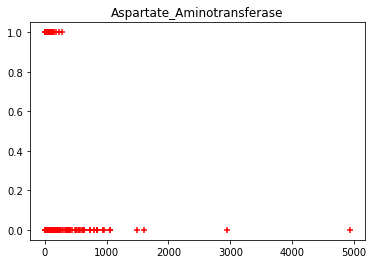

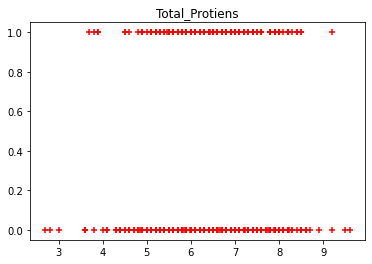

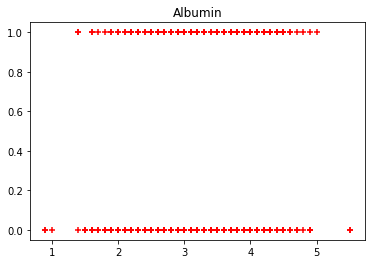

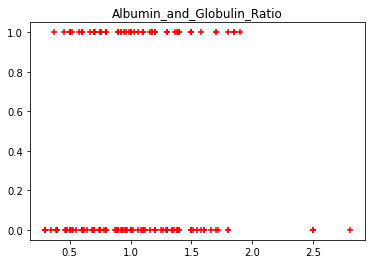

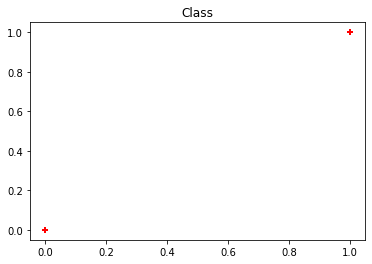

In [56]:
for feature in df2:
    plt.scatter(df2[feature], df2.Class, marker='+', color='red')
    plt.title(feature)
    plt.show()

### Correlation Matrix

<AxesSubplot:>

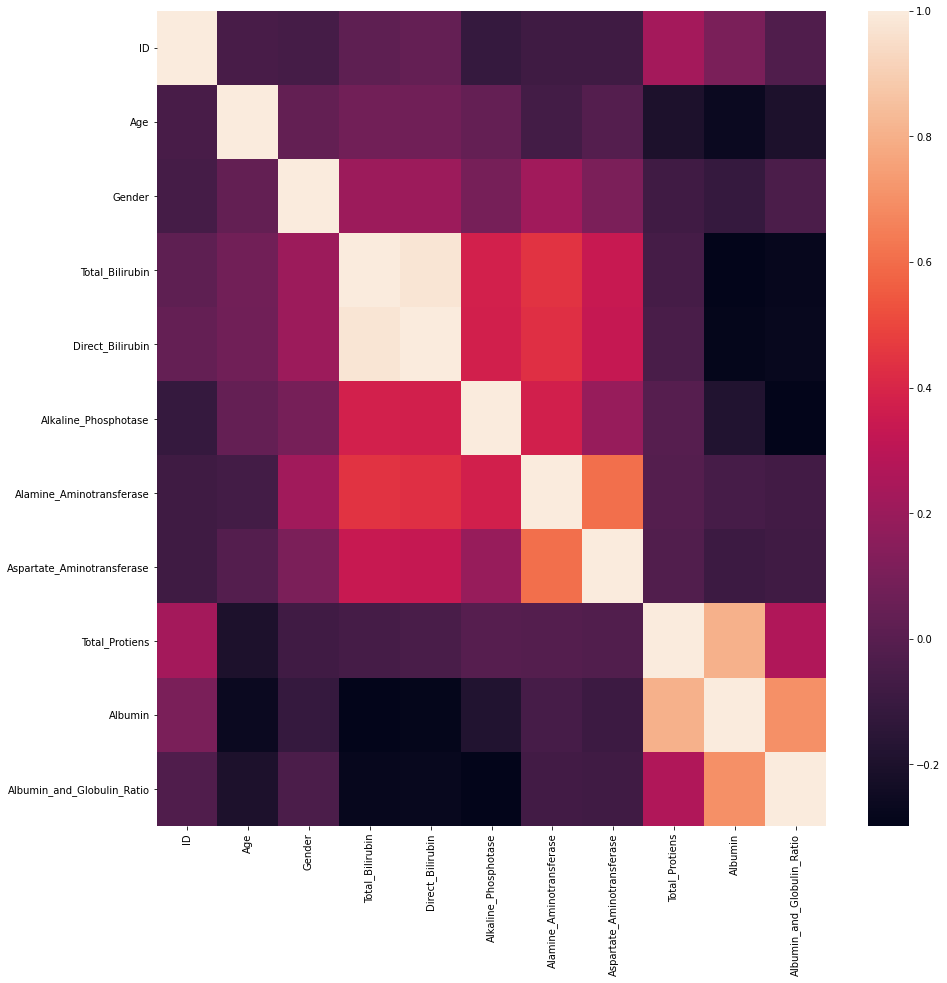

In [57]:
#Using Pearson Correlation

corrmat = X_over.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corrmat)

##### Note:
from the above correlation plot we can infer that Total_Bilirubin and Direct_Bilirubin are highly correlated so we must drop one of the column

In [58]:
X_over = X_over.drop(labels=['Direct_Bilirubin'], axis=1)

In [59]:
X_over.head()

,ID,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.0,65.0,0,0.530628,5.236442,2.833213,18.0,6.8,3.3,0.90
1,2.0,62.0,1,2.476538,6.551080,4.174387,100.0,7.5,3.2,0.74
2,3.0,62.0,1,2.116256,6.196444,4.110874,68.0,7.0,3.3,0.89
3,4.0,58.0,1,0.693147,5.209486,2.708050,20.0,6.8,3.4,1.00
4,5.0,72.0,1,1.589235,5.278115,3.332205,59.0,7.3,2.4,0.40


## Lets evaluate our model based on the original data which is not oversampled and than on the oversampled data inorder to do comparision of scores

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from sklearn.datasets import make_classification

### We will use Random Forest for classification for the evaluation

In [61]:
#On the original Data

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.731


In [62]:
#Now on the Over-Sampled Data

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_over, y_over, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.887


### Feature Scaling 

In [63]:
from sklearn.preprocessing import MinMaxScaler

In order to perform scaling we need to drop the categorical columns

In [64]:
X_norm = X_over.drop(labels=['Gender','ID'], axis=1)

In [65]:
scalar = MinMaxScaler()
scalar.fit(X_norm)
X_norm = pd.DataFrame(scalar.transform(X_norm), columns=X_norm.columns)

In [66]:
X_norm.head()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.709302,0.048609,0.308223,0.083659,0.001626,0.594203,0.521739,0.240
1,0.674419,0.535785,0.684260,0.341403,0.018296,0.695652,0.500000,0.176
2,0.674419,0.445585,0.582821,0.329197,0.011791,0.623188,0.521739,0.236
3,0.627907,0.089297,0.300513,0.059605,0.002033,0.594203,0.543478,0.280
4,0.790698,0.313641,0.320143,0.179554,0.009961,0.666667,0.326087,0.040


### Check if there occured any difference in the Distribution of variables after Scaling

<AxesSubplot:xlabel='Age', ylabel='Density'>

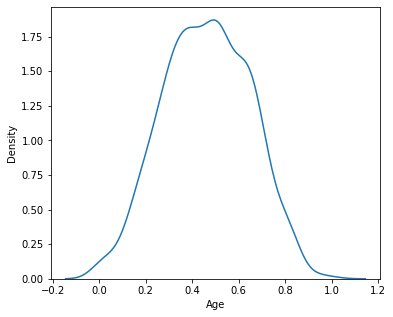

In [67]:
#After Scaling

plt.figure(figsize=(13,5))
plt.subplot(121)
sns.kdeplot(X_norm['Age'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

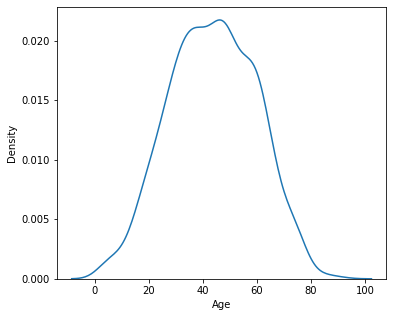

In [68]:
#before scaling

plt.figure(figsize=(13,5))
plt.subplot(121)
sns.kdeplot(X_over['Age'])

as we can see there is no difference in the distribution hence our Scaling has performed good

In [69]:
#now lets insert back the categorical column that we droped during Normalization

X_norm['Gender'] = X_over['Gender']

In [70]:
X_norm.head()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender
0,0.709302,0.048609,0.308223,0.083659,0.001626,0.594203,0.521739,0.240,0
1,0.674419,0.535785,0.684260,0.341403,0.018296,0.695652,0.500000,0.176,1
2,0.674419,0.445585,0.582821,0.329197,0.011791,0.623188,0.521739,0.236,1
3,0.627907,0.089297,0.300513,0.059605,0.002033,0.594203,0.543478,0.280,1
4,0.790698,0.313641,0.320143,0.179554,0.009961,0.666667,0.326087,0.040,1


In [71]:
#Now evaluate our model based on Normazlized data

model = RandomForestClassifier()

cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_norm, y_over, scoring='roc_auc', cv=cv1, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.881


#### After evaluating the model using random forest on normalized data and over sampelled data we found that the score of only Over sampelled data came out to be better than that of Normalized data.

## MODELING PREDICTIONS

#### Spliting our dataset into train and test with test size of 20% of the over all data 

## LOGISTIC REGRESSION

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_norm, y_over,
    test_size=0.2,
    random_state=0)

In [73]:
y_over.value_counts()

0    416
1    416
Name: Class, dtype: int64

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg.score(X_train, y_train)

0.7082706766917293

In [75]:
y_pred_log = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: ',log_reg.score(X_test, y_test))

Accuracy of logistic regression classifier on test set:  0.7485029940119761


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))
print(pd.crosstab(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        80
           1       0.77      0.74      0.75        87

    accuracy                           0.75       167
   macro avg       0.75      0.75      0.75       167
weighted avg       0.75      0.75      0.75       167

col_0   0   1
Class        
0      61  19
1      23  64


## XGBoost

In [77]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [78]:
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False)

In [79]:
xgb_classifier.fit(X_train,y_train)

[11:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [80]:
xgbpredictions = xgb_classifier.predict(X_test)

In [81]:
print("Accuracy of Model::",accuracy_score(y_test, xgbpredictions))

Accuracy of Model:: 0.8562874251497006


In [82]:
print(classification_report(y_test, xgbpredictions))
print(pd.crosstab(y_test, xgbpredictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        80
           1       0.85      0.87      0.86        87

    accuracy                           0.86       167
   macro avg       0.86      0.86      0.86       167
weighted avg       0.86      0.86      0.86       167

col_0   0   1
Class        
0      67  13
1      11  76


## Random Forest Classifier

In [83]:
rf_model = RandomForestClassifier(n_estimators=500,max_depth=50)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=500)

In [84]:
rf_model.score(X_test, y_test)

0.8383233532934131

In [85]:
rf_y_predicted = rf_model.predict(X_test)

In [86]:
print(classification_report(y_test, rf_y_predicted))
print(pd.crosstab(y_test, rf_y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82        80
           1       0.81      0.91      0.85        87

    accuracy                           0.84       167
   macro avg       0.85      0.84      0.84       167
weighted avg       0.84      0.84      0.84       167

col_0   0   1
Class        
0      61  19
1       8  79


## KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier as KNN

n_neighbors = [x for x in range(5, 86, 2)]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']

grid = {'n_neighbors': n_neighbors,
        'algorithm': algorithm,
        'weights': weights}

In [88]:
knn_model = KNN() 

knn_grid = GridSearchCV(estimator = knn_model, param_grid = grid, cv = 7, verbose=0)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61, 63, ...],
                         'weights': ['uniform', 'distance']})

In [89]:
knn_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}

In [90]:
knn_y_pred = knn_grid.best_estimator_.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': knn_y_pred})
pred_df.head()

,Actual,Predicted
320,0,1
471,1,1
235,0,0
419,0,0
8,1,1


In [91]:
# Measure the Accuracy Score
print("Accuracy score of the predictions: {value:.2f} %".format(value=metrics.accuracy_score(y_test, knn_y_pred)*100))

Accuracy score of the predictions: 79.04 %


In [92]:
print(classification_report(y_test, knn_y_pred))
print(pd.crosstab(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74        80
           1       0.73      0.94      0.82        87

    accuracy                           0.79       167
   macro avg       0.82      0.78      0.78       167
weighted avg       0.82      0.79      0.78       167

col_0   0   1
Class        
0      50  30
1       5  82


## ANN

In [93]:
import tensorflow as tf
from tensorflow import keras


ann_model = keras.Sequential([
    keras.layers.Dense(9, input_shape=(9,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

ann_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.4866
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5323
Epoch 3/100
21/21 [==============================] - 0s 898us/step - loss: 0.6722 - accuracy: 0.6389
Epoch 4/100
21/21 [==============================] - 0s 955us/step - loss: 0.6647 - accuracy: 0.6298
Epoch 5/100
21/21 [==============================] - 0s 892us/step - loss: 0.6558 - accuracy: 0.6411
Epoch 6/100
21/21 [==============================] - 0s 931us/step - loss: 0.6487 - accuracy: 0.6425
Epoch 7/100
21/21 [==============================] - 0s 857us/step - loss: 0.6345 - accuracy: 0.6784
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.6952
Epoch 9/100
21/21 [==============================] - 0s 925us/step - loss: 0.6166 - accuracy: 0.7029
Epoch 10/100
21/21 [==============================] - 0s 973us/step - loss: 0.6049 - accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7173
Epoch 83/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7337
Epoch 84/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.7119
Epoch 85/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5448 - accuracy: 0.7110
Epoch 86/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7564
Epoch 87/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.7170
Epoch 88/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7391
Epoch 89/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7385
Epoch 90/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7407
Epoch 91/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.7057
Epoch 92/100


In [94]:
ann_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5069 - accuracy: 0.7425


[0.5068774819374084, 0.742514967918396]

In [95]:
ann_yp = ann_model.predict(X_test)
ann_yp[:5]

array([[0.79739034],
       [0.7020023 ],
       [0.06342536],
       [0.19655693],
       [0.7811971 ]], dtype=float32)

In [96]:
ann_y_pred = []
for element in ann_yp:
    if element > 0.5:
        ann_y_pred.append(1)
    else:
        ann_y_pred.append(0)

In [97]:
ann_y_pred[:10]

[1, 1, 0, 0, 1, 1, 1, 1, 0, 1]

In [98]:
print(classification_report(y_test, ann_y_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72        80
           1       0.74      0.78      0.76        87

    accuracy                           0.74       167
   macro avg       0.74      0.74      0.74       167
weighted avg       0.74      0.74      0.74       167



## LETS BUILD MODEL ON UNSAMPELLED DATA AND CHECK THE SCORES

### LOGISTIC REGRESSION

In [99]:
X_over = X_over.drop(labels=['ID'], axis=1)

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_over, y_over,
    test_size=0.2,
    random_state=0)

In [101]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg.score(X_train, y_train)

C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7142857142857143

In [102]:
y_pred_log = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: ',log_reg.score(X_test, y_test))

Accuracy of logistic regression classifier on test set:  0.7425149700598802


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))
print(pd.crosstab(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        80
           1       0.73      0.79      0.76        87

    accuracy                           0.74       167
   macro avg       0.74      0.74      0.74       167
weighted avg       0.74      0.74      0.74       167

col_0   0   1
Class        
0      55  25
1      18  69


### XGBoost

In [104]:
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, random_state=111)

In [105]:
xgb_classifier.fit(X_train,y_train)

[12:00:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=111,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [106]:
xgbpredictions1 = xgb_classifier.predict(X_test)

In [107]:
print("Accuracy of Model::",accuracy_score(y_test, xgbpredictions1))

Accuracy of Model:: 0.8562874251497006


In [108]:
print(classification_report(y_test, xgbpredictions1))
print(pd.crosstab(y_test, xgbpredictions1))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        80
           1       0.85      0.87      0.86        87

    accuracy                           0.86       167
   macro avg       0.86      0.86      0.86       167
weighted avg       0.86      0.86      0.86       167

col_0   0   1
Class        
0      67  13
1      11  76


## RANDOM FOREST CLASSIFER

In [109]:
rf_model1 = RandomForestClassifier(n_estimators=500, max_depth=40)
rf_model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, n_estimators=500)

In [110]:
rf_model1.score(X_test, y_test)

0.8203592814371258

In [111]:
y_predicted_rf = rf_model1.predict(X_test)

In [112]:
print(classification_report(y_test, y_predicted_rf))
print(pd.crosstab(y_test, y_predicted_rf))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        80
           1       0.78      0.91      0.84        87

    accuracy                           0.82       167
   macro avg       0.83      0.82      0.82       167
weighted avg       0.83      0.82      0.82       167

col_0   0   1
Class        
0      58  22
1       8  79


## KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier as KNN

n_neighbors = [x for x in range(5, 86, 2)]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']

grid = {'n_neighbors': n_neighbors,
        'algorithm': algorithm,
        'weights': weights}

In [114]:
knn_model = KNN() 

knn_grid = GridSearchCV(estimator = knn_model, param_grid = grid, cv = 7, verbose=0)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61, 63, ...],
                         'weights': ['uniform', 'distance']})

In [115]:
knn_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 51, 'weights': 'distance'}

In [116]:
knn_y_pred = knn_grid.best_estimator_.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': knn_y_pred})
pred_df.head()

,Actual,Predicted
320,0,1
471,1,1
235,0,0
419,0,0
8,1,1


In [117]:
# Measure the Accuracy Score
print("Accuracy score of the predictions: {value:.2f} %".format(value=metrics.accuracy_score(y_test, knn_y_pred)*100))

Accuracy score of the predictions: 71.26 %


In [118]:
print(classification_report(y_test, knn_y_pred))
print(pd.crosstab(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68        80
           1       0.70      0.78      0.74        87

    accuracy                           0.71       167
   macro avg       0.71      0.71      0.71       167
weighted avg       0.71      0.71      0.71       167

col_0   0   1
Class        
0      51  29
1      19  68


## ANN

In [119]:
import tensorflow as tf
from tensorflow import keras


ann1_model = keras.Sequential([
    keras.layers.Dense(9, input_shape=(9,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

ann1_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

ann1_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 1ms/step - loss: 5.0536 - accuracy: 0.4713
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 2.5857 - accuracy: 0.5491
Epoch 3/100
21/21 [==============================] - 0s 938us/step - loss: 1.5469 - accuracy: 0.5662
Epoch 4/100
21/21 [==============================] - 0s 892us/step - loss: 1.2975 - accuracy: 0.6001
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.9736 - accuracy: 0.5819
Epoch 6/100
21/21 [==============================] - 0s 996us/step - loss: 0.8275 - accuracy: 0.5947
Epoch 7/100
21/21 [==============================] - 0s 933us/step - loss: 0.7630 - accuracy: 0.6103
Epoch 8/100
21/21 [==============================] - 0s 993us/step - loss: 0.7514 - accuracy: 0.5861
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7115 - accuracy: 0.5694
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7108 - accuracy: 0.5750

21/21 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.6938
Epoch 83/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7123
Epoch 84/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.6964
Epoch 85/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.6836
Epoch 86/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.6854
Epoch 87/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.6798
Epoch 88/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.6800
Epoch 89/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.6660
Epoch 90/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.6833
Epoch 91/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.7194
Epoch 92/100


In [120]:
ann1_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7126


[0.5773026943206787, 0.71257483959198]

## As we can see that XGBOOST CLASSIFIER surprisingly on UNSCALED data is giving us the best accuracy score and over all parameter scores followed by RandomForest

#### Lets check for the features that contributes the most to least in our predictions.

In [121]:
rf_model.feature_importances_

array([0.12739537, 0.15136977, 0.15405984, 0.12813851, 0.15226155,
       0.08712495, 0.0839513 , 0.08939955, 0.02629915])

Text(0.5, 0, 'Random Forest Feature Importance')

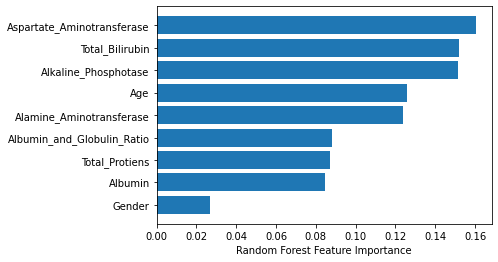

In [122]:
sorted_idx = rf_model1.feature_importances_.argsort()
plt.barh(X_over.columns[sorted_idx], rf_model1.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

From the above graph we can see that Total_Bilirubin is the most important feature followed by Asparate_Aminotransferase, Alkaline_Phosphatose and so on which will help us telling whether the person is a liver Patient or not

So we will build our prediction on XGBoost.
Lets test for some of the y_test rows 

In [123]:
#output of that row 

print('Actual Value: :',y_test.iloc[[89]])

#prediction 
print('prediction by RF Model: : ',  xgb_classifier.predict(X_test.iloc[[89]]))

Actual Value: : 241    0
Name: Class, dtype: int32
prediction by RF Model: :  [0]


In [124]:
#output of that row 

print('Actual Value: :',y_test.loc[[77]])

#prediction 
print('prediction by RF Model: : ', xgb_classifier.predict(X_test.iloc[[77]]))

Actual Value: : 77    0
Name: Class, dtype: int32
prediction by RF Model: :  [0]


In [125]:
#output of that row 

print('Actual Value: :',y_test.iloc[[63]])

#prediction 
print('prediction by RF Model: : ',  xgb_classifier.predict(X_test.iloc[[63]]))

Actual Value: : 613    1
Name: Class, dtype: int32
prediction by RF Model: :  [1]


### DataFrame with actual and predicted values

In [126]:
final_predictions = pd.DataFrame( xgb_classifier.predict(X_test), y_test, columns=['Predicted'])

In [127]:
final_predictions.head()

,Predicted
Class,
0,0
1,1
0,0
0,0
1,1
